# Rozhodovacie stromy

### Jakub Ševcech, Róbert Móro

IAU, 29.11.2018

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2018-19

## Pýtať sa môžete na http://slido.com#iau2018-w11

# 1. Rozhodovacie stromy

# 2. Preučenie

# 3. Vyber atributov

# Rozhodovacie stromy

<img src="img/binary_tree.png" alt="Drawing" style="width: 500px;"/>

<img src="img/flowchart.jpg" alt="Drawing" style="width: 500px;"/>

<img src="img/one_does_not.jpg" alt="Drawing" style="width: 500px;"/>

<img src="img/guess-ill-just-explain-it.jpg" alt="Drawing" style="width: 500px;"/>

Priklad a casti vysvetlenia prebrate z:
* [IAML: Decision Trees - slides](http://www.inf.ed.ac.uk/teaching/courses/iaml/2011/slides/dt.pdf)
* [IAML: Decision Trees - video](https://www.youtube.com/playlist?list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO)
* [Decision tree pruning](https://www.ismll.uni-hildesheim.de/lehre/ml-08w/skript/decision_trees2.pdf)

Odporucam pozriest si vo volnom case


Predstavte si, ze mate taketo data o tom ako niekto (volajme ho Jano) chodi hrat tenis a ku kazdemu riadku mate informacie o pocasi. Chcete vytvorit model, ktory bude predpovedat, ci Jano pojde hrat v novy den.
<img src="img/data1.png" alt="Drawing" style="width: 500px;"/>

Ako by sa na takychto datach snazil predikciu spravit rozhodovaci strom?

Tento algoritmus by sa snazil vytvorit pravidla, kedy Jano chodi a kedy nechodi hrat. Snazil by sa "pochopit" pravidlam v datach. Ako?

# Rozhodovaci strom je greedy, devide & conquer algoritmus.

Snazi sa rozdelit data na zaklade hodnot zvoleneho atributu tak, aby boli v podmnozinach pozorovania jednotne (idealne len z jednej triedy).

Devide & conquer kvoli rozdelovaniu na podmnoziny.

Greedy kvoli sposobu vyberu atributu, ktory pouzije ako pravidlo.

<img src="img/test.jpg" alt="Drawing" style="width: 500px;"/>

#  Kostra algoritmu:

1. Rozdel na podmnoziny
2. Su podmnoziny ciste (obsahuju len pozorovania jednej triedy)?
3. Ak ano: stop
4. Ak nie: rekurzivne opakuj

Skusime si to vyskusat na tychto datach.

<img src="img/data2.png" alt="Drawing" style="width: 500px;"/>

Vyberme si atribut *Outlook* na zaklade ktoreho to rozdelime.


<img src="img/split-outlook.PNG" alt="Drawing" style="width: 500px;"/>
Rozdelilo sa nam to na 3 skupiny. jedna je uz cista, takze na nej sme uz skoncili a tie dalsie dve budeme musiet este rekurzivne riesit.

Ked je jasno, tak sa zda, ze ked si vyberieme vlhkost, tak nam vzniknu ciste podmnoziny.


<img src="img/split-humidity.PNG" alt="Drawing" style="width: 500px;"/>
Teraz nam uz vznikli ciste podmnoziny, takze tusme skoncili.

Teraz este prava vetva. Tu sa da podla vetra.


<img src="img/split-wind.PNG" alt="Drawing" style="width: 500px;"/>

Vsetky podmnoziny su ciste, takze sme skoncili a vznikol nam rozhodovaci strom.

Ako teraz budeme klasifikovat nove pozorovanie?
<img src="img/dt-classif.PNG" alt="Drawing" style="width: 500px;"/>

# Teraz sme si vlastne ukazali priebeh algoritmu ID3 na vytvorenie rozhodovacieho stromu

<img src="img/id3.PNG" alt="Drawing" style="width: 500px;"/>

Tento algoritmus viac menej naraz vymysleli dvaja ludia. Boli ale z roznej domeny, takze o sebe nevedeli. Stale plati rozdelenie medzi komunitami. ID3 mate implementovany v Pythne a CART v R.

Otazne je, ako vybrat ten spravny atribut na rozdelenie

<img src="img/which_attribute.PNG" alt="Drawing" style="width: 500px;"/>

Chceme metriku, ktora nam da vysoku hodnotu pre ciste podmnoziny a nizku pre neciste (alebo naopak)

Podmienena pravdepodobnost nieje dobra, kedze ta nieje symetricka. Ma dve extremne hodnoty, ktore by nas zaujimali, ale medzi nimi je presne to, co nechceme. Ak by sme porovnavali dve pravdepodobnosti, tak nevieme jednoducho povedat, ktora je lepsia.

<img src="img/entropy.PNG" alt="Drawing" style="width: 500px;"/>

# Interpretacia Entropie

Mnosstvo bitov informacie (per pozorovanie), ktore potrebujeme na to, aby sme zaradili kazde pozoorvanie do spravnej triedy.

Ak je to 50/50, tak pre kazde pozoorvanie potrebujeme 1 bit na to ab ysme oznacili ci patri do triedy alebo nie. Ak to je iny pomer, tak potrebujeme menej, pretoze nam staci oznacit pozorovania z menej pocetnej triedy. Ak su vsetky pozorovania z jednej triedy, tak ich nepotrebujeme oznacovat vobec.

Pre Multiclass kalsifikaciu je vzorec entropie

<img src="img/multiclass.PNG" alt="Drawing" style="width: 300px;"/>

<img src="img/information_gain.PNG" alt="Drawing" style="width: 500px;"/>

### information gain = mutual information

# Interpretacia Information gain

Kolko bitov istoty ziskame ak pouzijeme zvoleny atribut na rozdelenie?

Ide vlastne o zmenu entropie pri pouziti rozdelenia pomocou zvoleneho atributu. Kolko informacie vlastne dane rozdelenie do dat pridava.

## Velka vyhoda rozhodovacich stromov je priamociara interpretovatelnost natrenovaneho modelu. Daju sa z neho priamo vytvorit pravidla.

<img src="img/interpretable.PNG" alt="Drawing" style="width: 500px;"/>

# Co s datami, ktore niesu kategoricke?

## Thrashold split

Usporiadajte hodnoty atributu a vyskusajte hodnoty medzi hodnotami atributu ako potencialne hranicne hodnoty. 

<img src="img/threshold_split.PNG" alt="Drawing" style="width: 500px;"/>

Vyhodnotenie vhodnosti roznych hranicnych bodov pomocou zvolenej metriky (Entropy, Information gain, ...)

Staci pozerat na hranicne body medzi pozorovaniami, kde sa meni trieda.

Vacsina kniznic to uz ma v sebe zabudovane a nemusite sa o to starat.

# Preucenie

Zastavovacia podmienka vytvarania stromu su ciste listy. Co ak nam v liste zostane len velmi malo pozorovani. Dajme tomu 1. 

* Vtedy je list urcite cisty, ale bude sa dat taky strom pouzit aj na testovacej sade? 
* Chyba na trenovacej sade bude 0, ale na testovacej bude asi pomerne vysoka. 
* Pravidla, ktore vytvori budu velmi zlozite a budu velmi zle zovseobecnitelne. V podstate sa len nauci celu trenovaciu sadu naspamat. 
* Bude pretrenovany. 

<img src="img/overfitting.PNG" alt="Drawing" style="width: 500px;"/>

# Bias / Variance

S pretrenovanim uzko suvisia terminy bias (skreslenie) a viarance (variancia)

* **Bias** je chyba spôsobená aproximáciou zložitého problému jednoduchším modelom 

> Nieco nam v tom modely chyba

> Robime nejaku systematicku chybu. 

* **Variancia** nám hovorí, ako velmi by sa zmenil model, ak by sme použili inú trénovaciu sadu

> Hovori nam to aky nestaly bude model na datach, ktore predtym nevidel

![bias-variance](img/bias-variance2.jpg)

## Pekne sa to vizualizuje na regresii

![overfit](img/overfit.png)

* Ak máme velmi velky bias, tak to znamena, ze mame nedotrenovany model (underfitting) a nieco nam v nom chyba
* Ak mame velku varianciu, tak to indikuje, ze sme model pretrenovali (overfitting)

## Celkova chyba je zlozena z variancie a biasu

A z nahodneho sumu v datach

Tieto dve chyby nevieme od seba oddelit, ale snazime sa najst bod, kde je ich sucet minimalny

![bias-variance](img/bias-variance.png)

## Tie dve chyby nevieme od seba oddelit, ale ich sucet vieme odhadnut pomocou chyby na validacnej vzorke

Snazime sa najst taku zlozitost modelu, aby som mal co najmensiu chybu na datach, ktore model nikdy nevidel

![validation error](img/validation-error.png)

Toto je vlastne prevrateny obrazok oproti tomu, ktory som ukazoval pri preuceni stromu pretoz sme pouzili metriku merajucu chybu a nie uspesnost.


zdroj obrazkov:
* [http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html](http://puremonkey2010.blogspot.sk/2016/09/ml-bias-variance-and-overfitting.html),
* [https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted) a 
* [http://scott.fortmann-roe.com/docs/BiasVariance.html](http://scott.fortmann-roe.com/docs/BiasVariance.html)

# Co sa da spravit na zabranenie pretrenovaniu

* Obmedzit rast stromu (maximalna hlbka, minimalna velkost listu, minimalna velkost vnutorneho uzlu, minimalny prirastok entropie pri rozdeleni ...)
* Dodatocne orezavanie stromu (odstranenie podstromov a nahradenie predikciou majtoritnej triedy v podstrome)

# Orezavanie (Pruning)
Vela roznych algoritmov. Vacsinou vyzaduju validacnu vzorku na overenie ci orezanie zlepsilo strom. Pri pretrenovanom strome je chyba na trenovacej sade velmi mala a kazde orezanie by ju zhorsilo. Preto potrebujeme validacnu sadu aby sme zistili ci sa orezanie nejak prejavi aj na nej.

## Reduced-Error Pruning
Najpopularnejsi algoritmus orezavania

1. Klasifikuj pozorvania z validacnej vzorky
2. Pre kazdy vnutorny uzol:
> a. Spocitaj chyby na pozorovaniach z validacnej vzorky, ktore spadaju do podstromu. 
> b. Spocitaj chybu ak by sa podstrom nahradil predikciou majoritnej triedy trenovacich pozorovani, ktore spadaju do podstromu.
> Rozdiel tychto dvoch chyb je redukcia chyby na podstrome
3. Odstran podstrom s najvacsou redukciou chyby na validacnej vzorke
4. Opakuj pokial nastava nejaka redukcia


## Rule Post-Pruning

1) Transformuj strom na pravidla (jedno pravidlo pre kazdy prechod od korena k listom)

> Outlook=sunny ^ humidity=high -> No

> Outlook=sunny ^ humidity=normal -> Yes

> Outlook=overcast -> Yes

> Outlook=rain ^ wind=strong -> No

> Outlook=rain ^ wind=weak -> Yes

2) Pre kazdeho predchodcu v pravdle: odstran ho ak jeho odstranenim klesne chyba na validacnej vzorke (v ramci jedneho pravidla sa zastav ak uz chyba neklesa)

3) Usporiadaj zostavajuce pravidla podla uspesnosti.

# Ukazka v Pythone

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
plt.rcParams['figure.figsize'] = 9, 6

# Nacitam si vsetky data. Trenovacie a aj jedno testovacie pozorovanie

In [3]:
data = pd.read_csv('tenis.csv')
data

,Humidity,Outlook,Play,Wind
0,High,Sunny,No,Weak
1,High,Sunny,No,Strong
2,High,Overcast,Yes,Weak
3,High,Rain,Yes,Weak
4,Normal,Rain,Yes,Weak
5,Normal,Rain,No,Strong
6,Normal,Overcast,Yes,Strong
7,High,Sunny,No,Weak
8,Normal,Sunny,Yes,Weak
9,Normal,Rain,Yes,Weak


In [5]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion='entropy')

X = data.loc[data.index < 14, ['Humidity', 'Outlook', 'Wind']]
y = data.loc[data.index < 14, 'Play']
cls.fit(X, y)

ValueError: could not convert string to float: 'Strong'

# Scikit-learn vie pracovat len s numerickymi hodnotami

Potrebujeme teda spravit kodovanie

In [6]:
# One-hot kodovanie vsetkych dat okrem predikovaneho stlpcu
encoded = pd.concat([pd.get_dummies(data[column], prefix=column) for column in set(data.columns) - {'Play'}], axis=1)
encoded

,Wind_Strong,Wind_Weak,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rain,Outlook_Sunny
0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,1
2,0,1,1,0,1,0,0
3,0,1,1,0,0,1,0
4,0,1,0,1,0,1,0
5,1,0,0,1,0,1,0
6,1,0,0,1,1,0,0
7,0,1,1,0,0,0,1
8,0,1,0,1,0,0,1
9,0,1,0,1,0,1,0


# Pozor, v predchadzajucom kode som trochu podvadzal. Kto vie co som spravil zle?

# Pouzil som testovacie data na natrenovanie transformacie. 

Posledne pozorovanie patri do testovacich dat. One hot encoder, ktory som pouzil sa pozrel na vsetky unikatne hodnoty v datach v ratane testovacich a vytvoril pre kazdu unikatnu hodnotu novy stlpec. 

Co by sa stalo ak by som v testovacich datach mal hodnotu, ktora sa v trenovacich nenachadza?

Co by sa malo stat pospravnosti?

# Vyberiem si len trenovacie data a natrenujem klasifikator

In [7]:
X = encoded[encoded.index < 14]
y = data.loc[data.index < 14, 'Play']

cls.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
test = encoded[encoded.index == 14]
cls.predict(test)

array(['Yes'], dtype=object)

# Natrenovany strom si mozem vyzualizovat

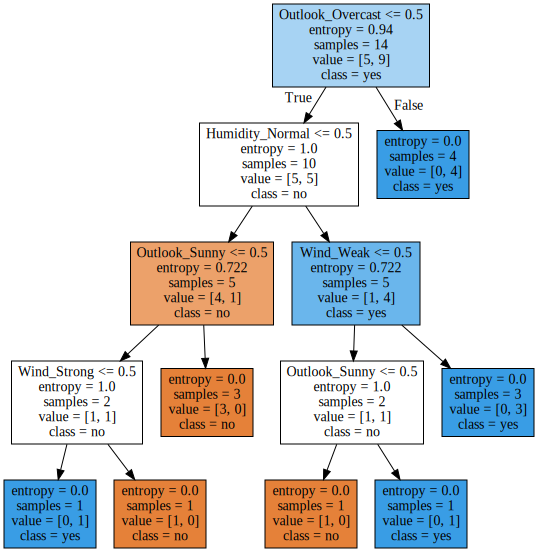

In [9]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(cls, 
                               out_file=None,
                               feature_names=encoded.columns,
                               class_names=['no', 'yes'],
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

# Stromcek nevyzera uplne rovnako ako ten, ktory sme ukazovali na zaciatku. je to sposobene one-hot kodovanim. Vieme robit len binarne rozhodnutia.

# Ukazka - Pretrenovanie

In [10]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Rozdelíme údaje
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=4)

print('# train data: ', len(X_train))
print('# test data: ', len(X_test))

# train data:  455
# test data:  114


## Natrenujem si viacero stromov, kde kazdemu obmedzim jeho maximalnu hlbku aby som vytvoril stromy s roznou zlozitostou

In [12]:
results = []
estimators = []
for i in range(1, X_train.shape[1] + 1):  
    row = {'model_complexity': i}
    # Vytvoríme rozhodovací strom
    clf = DecisionTreeClassifier(max_depth = i) # strom s maximalnou hlbkou 1-pocet atributov,  simulujeme tak zlozitost modelu
    
    pred = clf.fit(X_train, y_train).predict(X_train) # natrenovanie modelu a predikovanie na trenovacej sade
    row['train'] = 1-accuracy_score(y_train, pred) # chyba na trenovacej sade
    
    pred = clf.predict(X_test)
    row['test'] = 1-accuracy_score(y_test, pred) # chyba na testovacej sade
    results.append(row)
    estimators.append(clf)

In [13]:
complexity_df = pd.DataFrame(results)
complexity_df.head()

,model_complexity,test,train
0,1,0.140351,0.065934
1,2,0.131579,0.052747
2,3,0.114035,0.021978
3,4,0.114035,0.017582
4,5,0.078947,0.008791


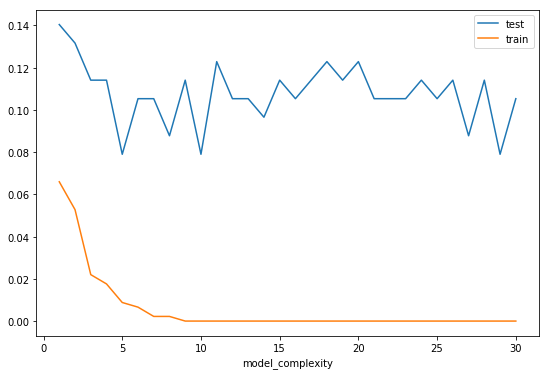

In [14]:
complexity_df.plot(x='model_complexity')

S rastucou zlozitostou modelu sa mi nijak nezmensuje chyba na trenovacej vzorke. Na testovacej tiez nie. Vacsinou sa dokonca zvacsuje. Toto je indikator toho, ze sme ten model preucili. Naucil sa data a nie vztahy za nimi. Ak skusame predikciu na inych datach, tak narazime na velku chybu sposobenu varianciou

# Mozeme si skusit vizualizovat rozne natrenovane modely

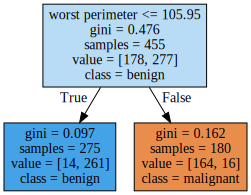

In [15]:
graph = Source(export_graphviz(estimators[0], # len jeden atribut pouzity na rozhodnutie
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

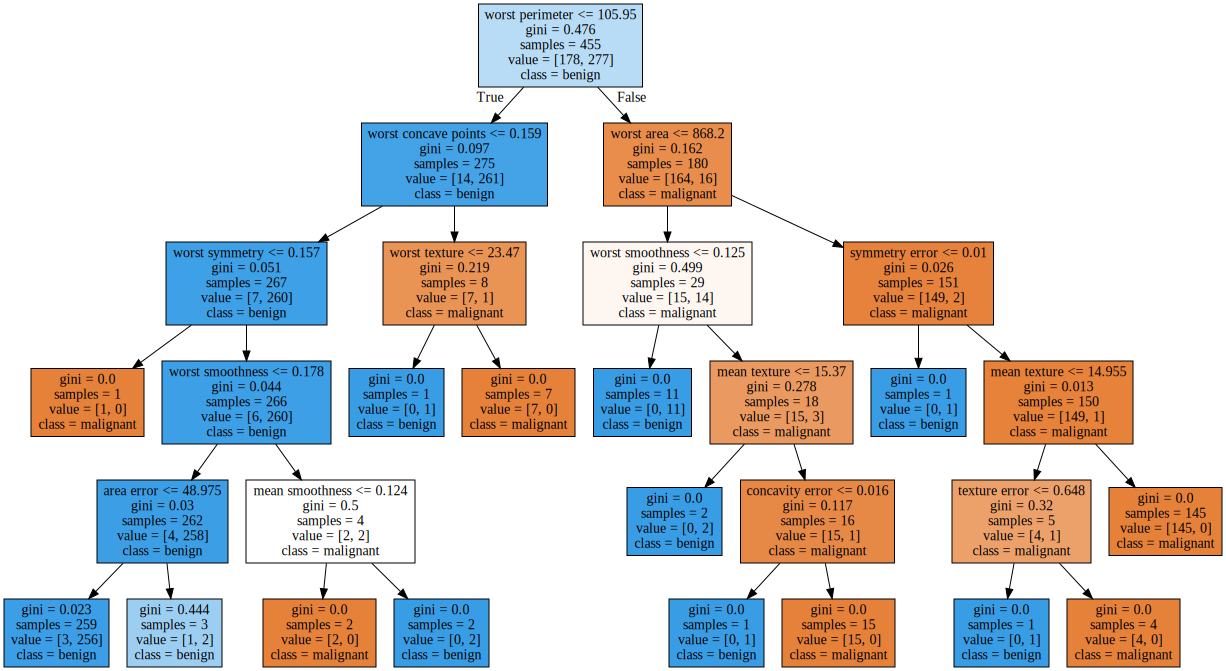

In [16]:
graph = Source(export_graphviz(estimators[4], # model, za ktorym zacala rast chyba na validacnej vzorke
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

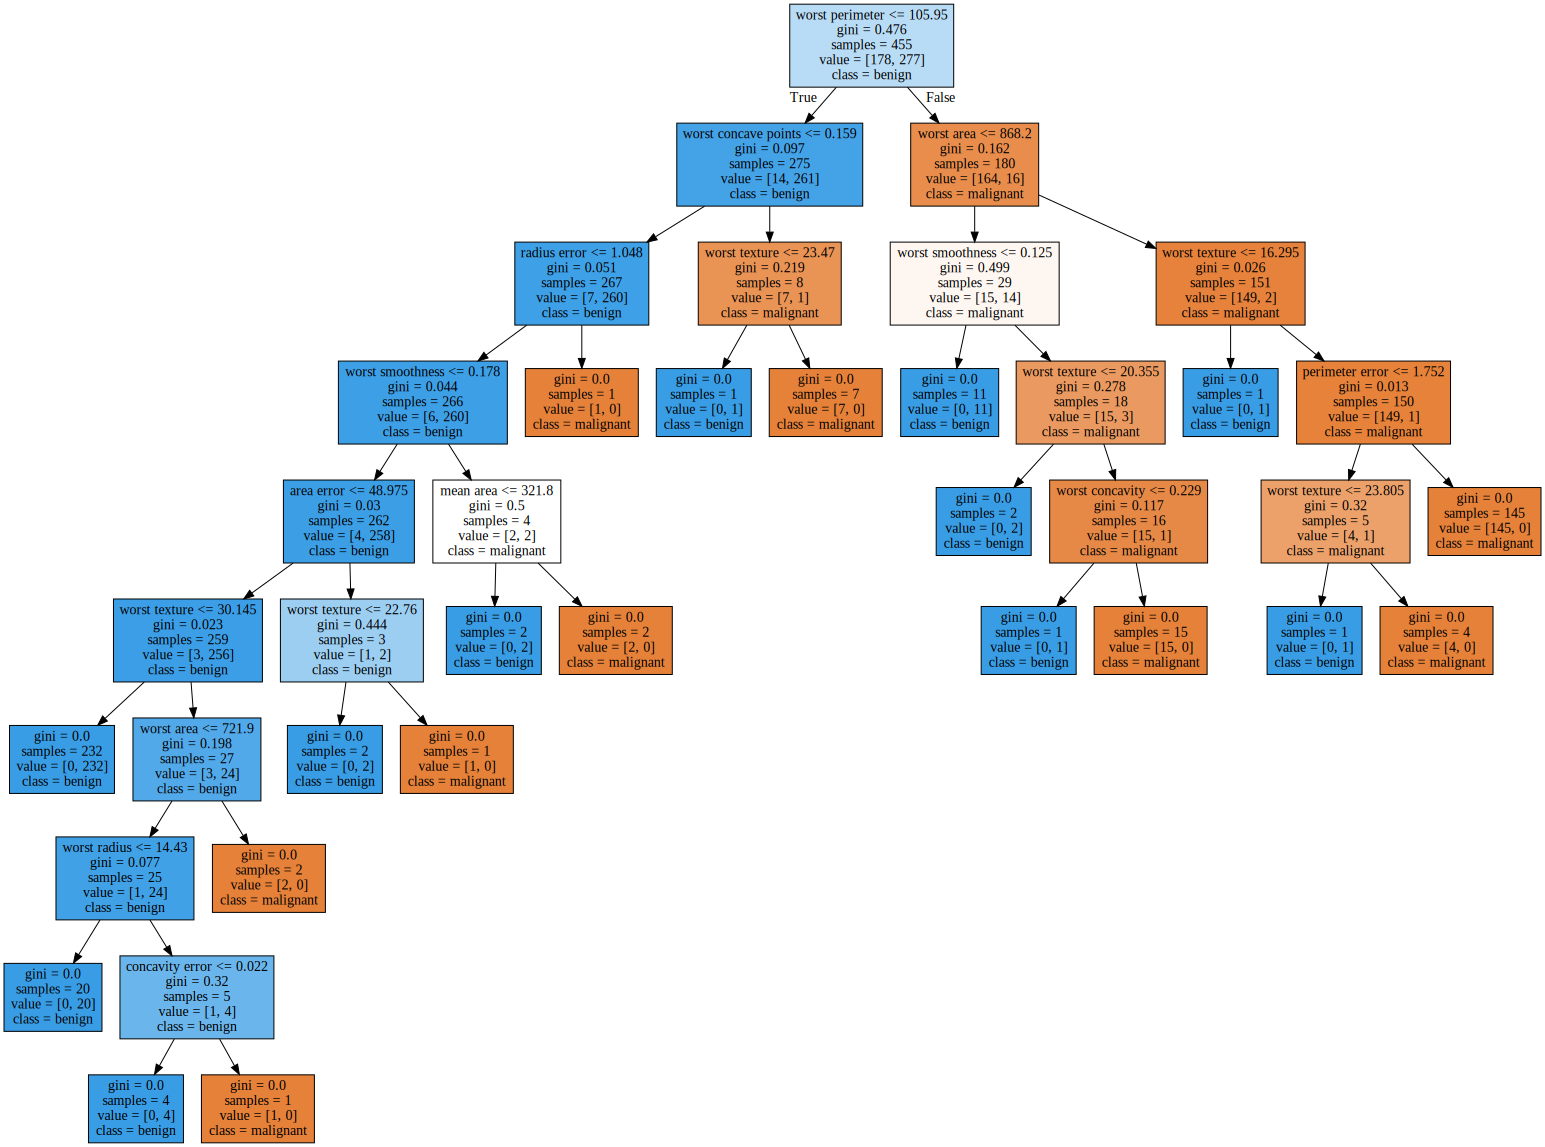

In [17]:
graph = Source(export_graphviz(estimators[-1], # najzlozitejsi model
                               out_file=None,
                               feature_names=feature_names,
                               class_names=label_names,
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:40% !important;height:40% !important;}</style>"
HTML(style)

# Existuju viacere sposoby ako riesit pretrenovanie a kontrolovat varianciu a bias

## Ziskat viac dat :)

## Ucenie suborom metod (ensemble learning)
toto nemusite teraz vediet, ale je dobre ak poznate, ze take nieco existuje

* **Bagging** 

> Kombinovanie predikcii **nezavyslich** modelov do jednej predikcie. Kazdy model musi byt **lepsi ako nahoda**.

> Pouziva sa na znizenie variancie

* **Boosting** 

> Pouziva na znizenie biasu. Pozor, moze zvysit varianciu!

> Iterativne trenovanie dalsich klasifikatorov s vahou na tie pozorovania, na ktorych sa predchadzajucim modelom nedarilo


## Zjednodusenie modelu
* Vyber atributov
* Regularizacia
* Orezavanie stromov

# Vyber atributov

# Preco by som mal vyberat len niektore atributy?

* redundancia - skryte zavyslosti medzi nimi 
* irelevancia - nemusia mat ziadny vplyv na predikovanu hodnotu
* pretrenovanie - model sa da natrenovat aj na nahodnych datach a na trenovacej sade bude fungovat. Na testovacej ale bude fungovat uplne strasne
* prekliatie dimenzionality - pri velkom pocte atributov potrebujem vela dat na to aby som dostatocne pokryl priestor moznych hodnot
* produktivita / rychlost - moja ako analytika a aj mojich modelov (trenovanie aj predikcia)
* zrozumitelnost - lahsie sa vysvetluje model, ktory ma menej atributov

# Existuju 3 skupiny pristupov na vyber atributov

> ## 1. Filter

> ## 2. Wrapper

> ## 3. Embedded

# 1. Filter

Vyber atributov bez ohladu na model, ktory sa chystame trenovat.

* rychle
* nezavisle na modeli (to je dobre aj zle: mozem ich pouzit na rozne modely, ale nedokazu vyuzit specificke vlastnosti konkretnych algoritmov)

# Najjednoduchsia moznost je vyhodit atributy, ktore maju vsade rovnake hodnoty

pozor, nie malu varianciu. Hlavne pri nevyvazenych triedach mozu byt prave taketo atributy velmi uzitocne

In [18]:
from sklearn.feature_selection import VarianceThreshold

X = np.array([[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]])
X

array([[0, 2, 0, 3],
       [0, 1, 4, 3],
       [0, 1, 1, 3]])

In [19]:
selector = VarianceThreshold(threshold=0.0)
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

# Mozeme vyberat atributy aj na zaklade zavislosti atributu a predikovanej hodnoty

In [20]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # daju sa pouzit aj ine metriky

iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

## Metriku ako napriklad Chi kvadrat pouzijeme na kvantifikovanie zavislosti k predikovanej premennej.

Najlepsie atributy nechame

In [21]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

## Daju sa pouzivat rozne metriky
> Klasifikacia
* chi2 - nezaporne cisla
* mutual_info_classif - diskretne data
* f_classif - ANOVA medzi predikovanou premennou a atributmi

> Regresia
* f_regression - F test medzi predikovanou hodnotou a atributmi
* mutual_info_regression - Mutual information na realnych cislach

## Da sa vyberat K najlepsich alebo nejaky percentil alebo nechat pocet atributov na statisticky test

* SelectKBest 
* SelectPercentile

* SelectFpr - false positive rate
* SelectFdr - false discovery rate  
* SelectFwe - family wise error

* GenericUnivariateSelect - Vsetko dohromady a strategia sa da nastavit parametrom

# Vlastnosti filtrov

* vacsinou rychle
* nezavisle na modely (nepotrebujem opakovane trenovat model ale vybrane atributy nemusia byt najvhodnejsie pre kazdy model)
* vacsinou sa pozeraju len na vlastnosti dvojic predikovana premenna - atribut, kombinacie viacerych atributov nezohladnuju


# Varovanie, PCA sa casto pouziva na redukciu dimenzionality ale nie na vyber atributov

Je to casta chyba

PCA **vytvara nove** atributy ako **linearnu kombinaciu** povodnych. Nevybera z povodnych.

Ak pouzijeme dolezitost atributov, ktore vstupuju do PCA, tak ziskame len ich varianciu. To je ekvivalentne s VarianceThreshold spomenutym vyssie. Aby sme toto ziskali ale nemusime pocitat cele PCA. Staci nam variancia kazdeho atributu oddelene. 

Navyse do PCA by mali vstupovat data s normalizovanou varianciou, takze by sme namiesto variance score pre kazdy atribut dostali stale rovnaku hodnotu.

# 2. Wrapper

# Zakladna myslienka

haldame podmnozinu atributov, na ktorej bude model davat najlepsie vysledky

Skusame rozne podmnoziny a vyberame tu najlepsiu

# Problem

Ak mame dataset s N atributmi, tak pocet roznych podmnozin je $2^N$

To znamena, ze by sme museli nas model natrenovat $2^N$ krat.

Chcelo by to najst proces, ktory minimalizuje pocet pokusov a zaroven maximalizuje uspesnost modelu

# Greedy pristupy

Najcastejsie sa pouzivaju greedy pristupy, ktore postupne zvacsuju sadu atributov (alebo zmensuju) tak, ze pridavaju (odoberaju) atribut tak aby sa co najviac zvysila uspesnost. Skusaju rozne podmnoziny atributov, ktore postupne zvacsuju alebo zmensuju.

# Kniznica Mlxtend

* Sequential Forward Selection (SFS)
> Postupne zvacsuje mnozinu atributov o ten, ktory najviac prispel k zlepseniu

> Zacina s mnozinami velksoti 1, vyberie najlepsiu a zafixuje atribut. K fixovanemu atributu prida dalsi a vytvori vsetky mozne podmnoziny velkosti 2. Vyberie najlepsiu ...

* Sequential Backward Selection (SBS)
> Postupne zmensuje mnozinu atributov o ten, ktory najmenej pomahal.

* Sequential Floating Forward Selection (SFFS)
> SFS s pokusom o vyhodenie uz pridanych atributov ak sa ukaze ze velmi nepomahaju 

* Sequential Floating Backward Selection (SFBS)
> SBS s pokusom o pridanie uz raz vyhodeneho atributu


# Scikit-Learn

* RFE - Recursive feature elimination
> Postupne vyhadzovanie atributov, ktore maju v modeli najnizsiu vahu (potrebujeme aby to model vedel povedat) 

* RFECV - RFE with cross-validation
> RFE s krizovou validaciou

# Priklad SFS

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, k_features=3, forward=True,  floating=False, verbose=2, scoring='accuracy', cv=0)
# pomocou tejto triedy vieme robit SFS, SFFS, SBS aj SFBS a dokonca aj pridat cross-validaciu

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2018-11-28 22:27:52] Features: 1/3 -- score: 0.96[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2018-11-28 22:27:52] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2018-11-28 22:27:52] Features: 3/3 -- score: 0.9733333333333334

## Zoznamy najlepsich podmnozin atributov pre jednotlive velkosti podmnozin

In [24]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96]),
  'avg_score': 0.96,
  'feature_names': ('3',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('2', '3')},
 3: {'feature_idx': (1, 2, 3),
  'cv_scores': array([0.97333333]),
  'avg_score': 0.9733333333333334,
  'feature_names': ('1', '2', '3')}}

# 3. Embedded

# Hlavna myslienka

Skombinovat vyhody filtrov a wrapprov

Model, ktory sa trenuje si bude priamo vyberat atributy, ktore su pre neho najlepsie

Len malo modelov to podporuje

* Linearne modely penalizovnae L1 (Lasso) alebo L1+L2 (Elastic Net) regularizaciou: SVM, Linearna regresia, Logisticka regresia ...

> Regularizacia zavadza do modelu penalizaciu za pocet / velkost vah atributov modelu. Nieje tam len chyba predikcie. Prirodzene sa tak vybera jednoduchsi model.

* RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

/home/ganimedes/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(150, 4)

# Po natrenovani nahodneho lesu viem vybrat dolezitost atributov.

Nahodny les je zjednodusene povedane: skupina stromov.

Viem sa pozriet ake atributy pouzivaju stromy na rozhodovanie a ako vysoko su v nich a podla toho odvodit ich dolezitost.

In [26]:
clf = RandomForestClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.11953934, 0.02307273, 0.32547631, 0.53191161])

In [27]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

# Co si odniest z prednasky?

* Rozhodovacie stromy su pomerne jednoduchy ale zaroven velmi silny nastroj.

* Pri stromoch sa velmi dobre interpretuje natrenovany model pomocou pravidiel.

* Pozor na pretrenovanie (nie len pri stromoch)

* Vyber atributov je dobry na redukciu problemu prekliatia dimenzionality.

> * Ak pouzivate nejaky linearny model alebo les, tak je zbytocne robit filtre a este viac zbytocne robit wrappre. Mozete vyuzit to, ze sa daju pouzit na embedded vyber atributov

> * Ak nemate cas na opakovane trenovanie modelu, tak filtre mozu byt dostatocny hotfix. Treba ale zvazit aku vlastnost atributov chcete pouzit na najdenie najdolezitejsich. 

> * Ak mate cas spustit to trenovanie viac krat, tak asi najlepsia moznost je SFFS alebo SFECV

<img src="img/potato-tree.jpg" alt="Drawing" style="width: 500px;"/>